In [2]:
import os
import sys
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from kneed import KneeLocator
from kneebow.rotor import Rotor
from scipy.signal import find_peaks
import landt_processing.landt_data_tools as lp

In [4]:
file = 'full_column_1.xlsx'
folder = r'C:\Users\Piotr\Documents\Github\LANDt-processing\landt_processing\tests\echem_xlsx_test'
test_df = lp.landt_file_loader(os.path.join(folder, file))

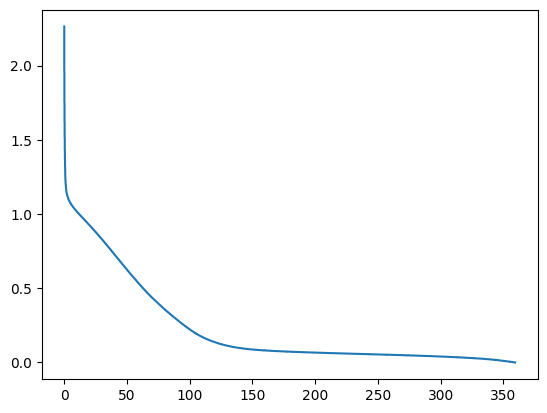

In [351]:
fig, ax = plt.subplots()
cap = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==0)]['SpeCap/mAh/g']
voltage = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==0)]['Voltage/V']
dqdv = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==0)]['dQ/dV/mAh/V']

ax.plot(cap,voltage)

128.1

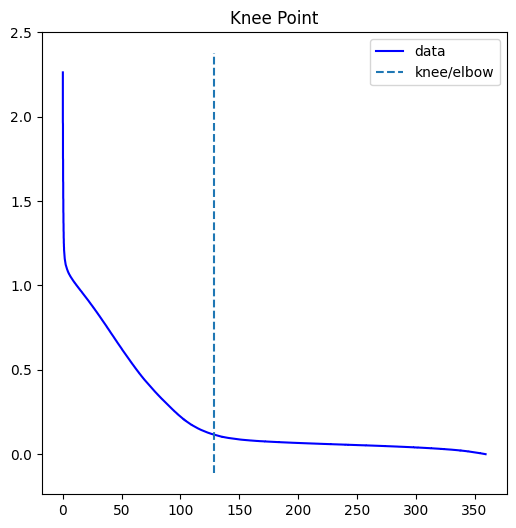

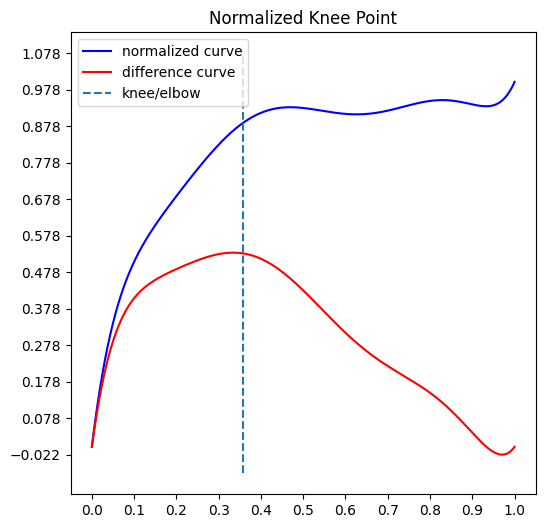

In [353]:
k2 = KneeLocator(cap, voltage, curve='convex', direction='decreasing', S=1, interp_method='polynomial')
k2.plot_knee()
k2.plot_knee_normalized()
k2.knee

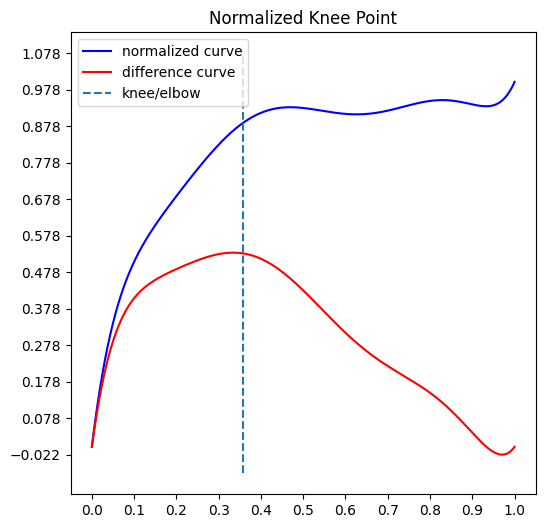

In [185]:
k2.plot_knee_normalized()

In [198]:
k2.knee

128.1

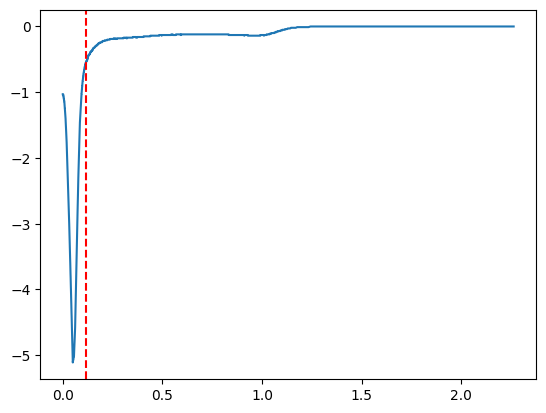

In [202]:
fig, ax = plt.subplots()
voltage = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==0)]['Voltage/V']
dqdv = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==0)]['dQ/dV/mAh/V']
ax.plot(voltage, dqdv)
ax.axvline(x=k2.knee_y, color='r', linestyle='--')

# find peak value and fit curve from peak to plateau, take this curve and differentiate it

In [322]:
voltage = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==0)]['Voltage/V'].values
dqdv = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==0)]['dQ/dV/mAh/V'].values
peak = np.argmin(dqdv)
print(peak)
# dqdv[peak:]
# voltage[peak]
len(voltage)

3262


4397

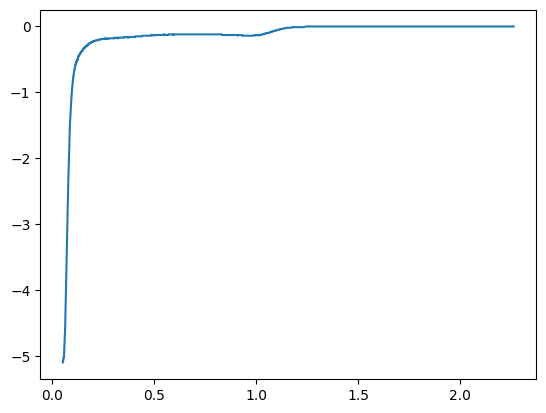

In [323]:
fig, ax = plt.subplots()
ax.plot(voltage[:peak], dqdv[:peak])

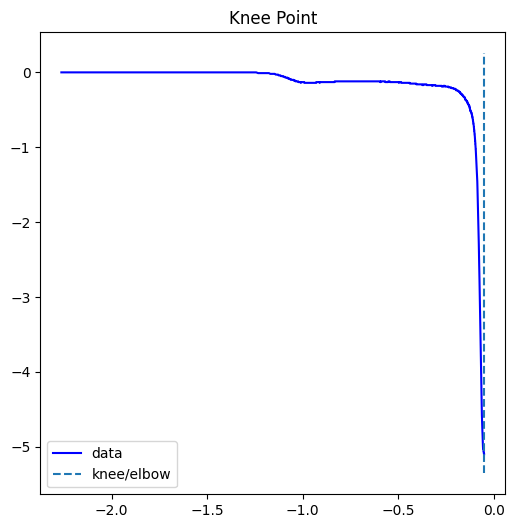

In [196]:
k3 = KneeLocator(-voltage[:peak], dqdv[:peak], curve='concave', direction='decreasing', interp_method='polynomial', polynomial_degree=12)
k3.plot_knee()

In [108]:
voltage[peak:3000]
dqdv[peak:3000]

array([7.19, 7.15, 7.15, ..., 0.11, 0.11, 0.11])

In [172]:
with open('dqdv.txt', 'w') as f:
    for item in dqdv[peak:3000]:
        f.write("%s, " % item)

In [209]:
voltage = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==1)]['Voltage/V'].values
dqdv = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==1)]['dQ/dV/mAh/V'].values
peak = np.argmax(dqdv)
x = voltage[peak:3000]
y = dqdv[peak:3000]
k1 = KneeLocator(x, y, curve='convex', direction='decreasing', online=False, S=100, interp_method='polynomial', polynomial_degree=15)
# k1 = KneeLocator(x, y, curve='convex', direction='decreasing', online=False, interp_method='interp1d')


c:\Users\Piotr\anaconda3\envs\analysis\lib\site-packages\kneed\knee_locator.py:174: RankWarning: Polyfit may be poorly conditioned
  p = np.poly1d(np.polyfit(x, y, self.polynomial_degree))


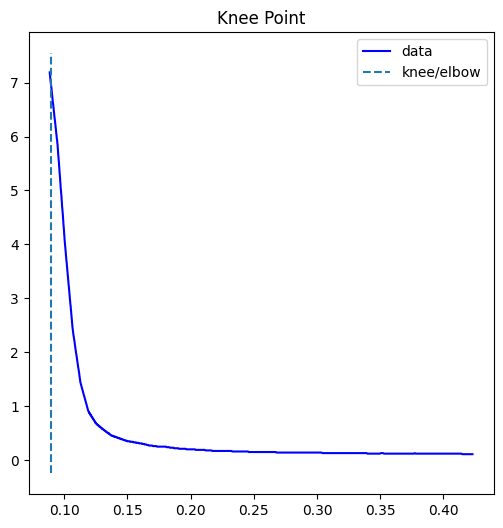

In [208]:
k1.plot_knee()

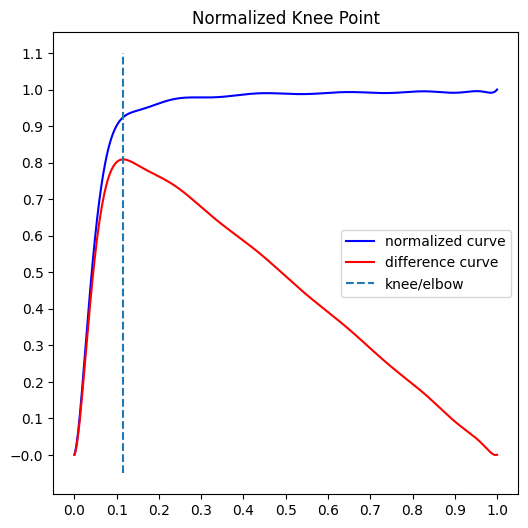

In [206]:
k1.plot_knee_normalized()

In [134]:
y_diff = k1.y_difference
max_y = y_diff.max()
max_y_index = np.argmax(y_diff)
y_diff[max_y_index]

0.8107065696984451

In [135]:
from scipy.signal import argrelextrema

In [140]:
maxima_indices = argrelextrema(y_diff, np.greater_equal)[0]

In [169]:
maxima_indices

array([   1,    2,    3,    4,    5,    7,    8,    9,   10,   11,   12,
         13,   14,   16,   17,   18,   19,   20,   21,   22,   23,   24,
         25,   27,   28,   29,   30,   31,   32,   33,   34,   35,   37,
         39,   40,   41,   42,   43,   44,   46,   47,   48,   49,   50,
         51,   52,   53,   54,   56,   57,   59,   60,   61,   62,   63,
         64,   66,   67,   68,   69,   70,   71,   72,   73,   74,   75,
         77,   78,   79,   80,   81,   82,   83,   84,   86,   88,   89,
         90,   91,   92,   93,   94,   95,   97,   98,   99,  100,  101,
        102,  103,  104,  105,  107,  108,  109,  110,  111,  112,  113,
        114,  116,  117,  118,  119,  120,  121,  122,  123,  124,  125,
        127,  128,  129,  130,  131,  132,  133,  135,  136,  137,  138,
        139,  140,  141,  142,  144,  145,  146,  147,  148,  149,  150,
        151,  153,  154,  155,  156,  157,  158,  159,  160,  162,  165,
        166,  167,  168,  169,  170,  172,  173,  1

In [170]:
y_diff[1113]

0.6803700209962571

In [116]:
k1.norm_elbow

0.3055056852184321

In [83]:
from kneed import DataGenerator as dg

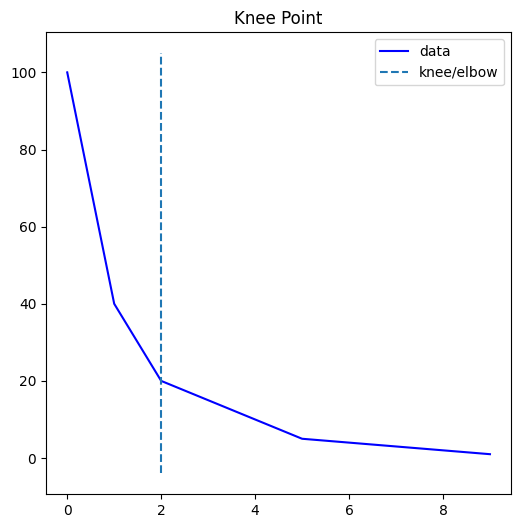

In [90]:
x, y = dg.convex_decreasing()
k1 = KneeLocator(x, y, curve='convex', direction='decreasing', interp_method='polynomial')
k1.plot_knee()

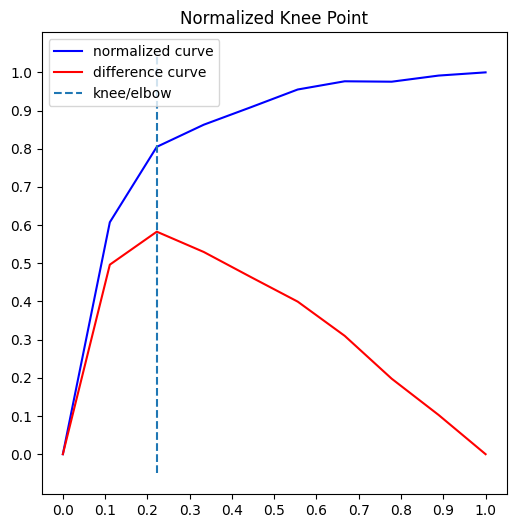

In [91]:
k1.plot_knee_normalized()

In [338]:
def inverse(x):
    return 1/x

x = np.linspace(0.1, 4, 10000)
y = inverse(x)
k1 = KneeLocator(x, y, curve='convex', direction='decreasing', interp_method='interp1d')

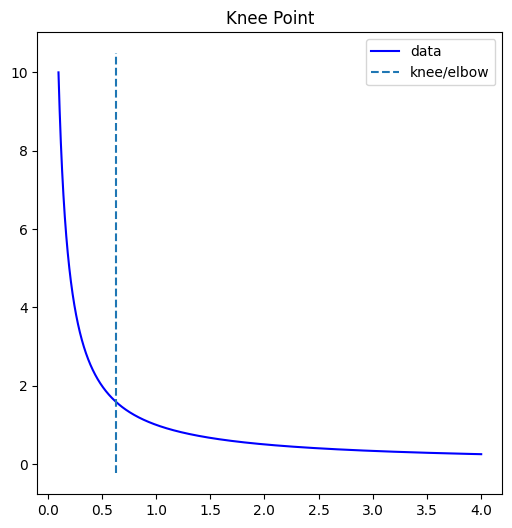

In [339]:
k1.plot_knee()

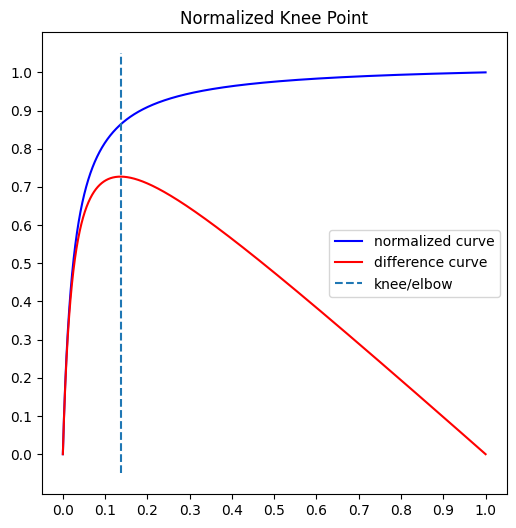

In [340]:
k1.plot_knee_normalized()

In [350]:
print(k1.norm_knee)
p = np.argmax(k1.y_difference)

k1.x_difference[p] == k1.norm_knee
print(k1.x_difference[p])
print(x[p])
print(k1.knee)

0.1365136513651365
0.1365136513651365
0.6324032403240323
0.6324032403240323


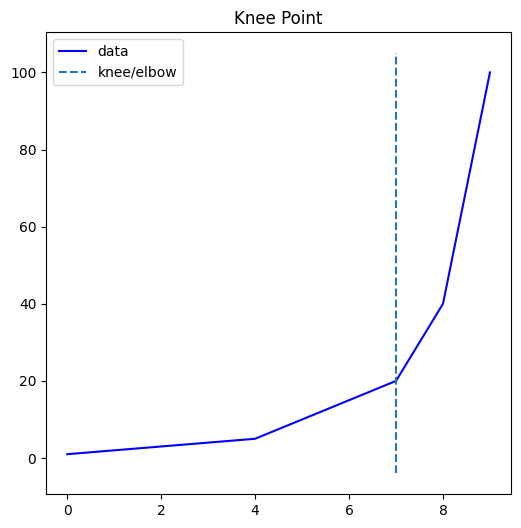

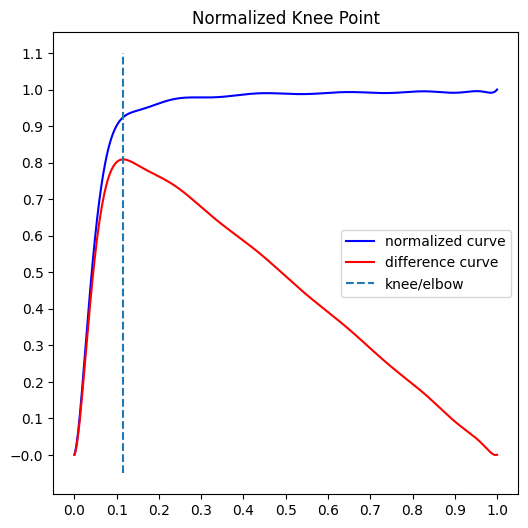

In [307]:
from kneed import KneeLocator, DataGenerator as dg
x, y = dg.convex_increasing()
kl = KneeLocator(x, y, curve="convex")
kl.plot_knee()
k1.plot_knee_normalized()

## Signal processing

In [219]:
from scipy.interpolate import splev, splrep
from scipy.signal import savgol_filter

In [525]:
voltage_0 = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==0)]['Voltage/V'].values
cap_0 = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==0)]['SpeCap/mAh/g'].values
dqdv_0 = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==0)]['dQ/dV/mAh/V'].values
voltage_1 = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==1)]['Voltage/V'].values
cap_1 = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==1)]['SpeCap/mAh/g'].values
dqdv_1 = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==1)]['dQ/dV/mAh/V'].values

In [362]:
df = pd.DataFrame({'voltage': voltage_0, 'cap': cap_0, 'dqdv': dqdv_0})
unique_v = df.astype(float).groupby('voltage').mean().index #get unique voltage values
unique_v_cap = df.astype(float).groupby('voltage').mean()['cap'] # get capacity for each unique voltage value
unique_v_dqdv = df.astype(float).groupby('voltage').mean()['dqdv'] # get dqdv for each unique voltage value

In [363]:
x_volt = np.linspace(min(voltage_0), max(voltage_0), num=int(1e4))
f_lit = splrep(unique_v, unique_v_cap, k=1, s=0)
y_cap = splev(x_volt, f_lit)
f_lit_dqdv = splrep(unique_v, unique_v_dqdv, k=1, s=0)
y_dqdv = splev(x_volt, f_lit_dqdv)

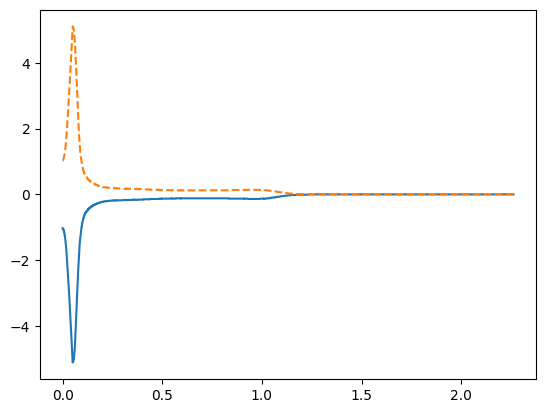

In [364]:
plt.plot(voltage_0,dqdv_0)
plt.plot(x_volt, -y_dqdv, linestyle='--')

0.2176210821082108

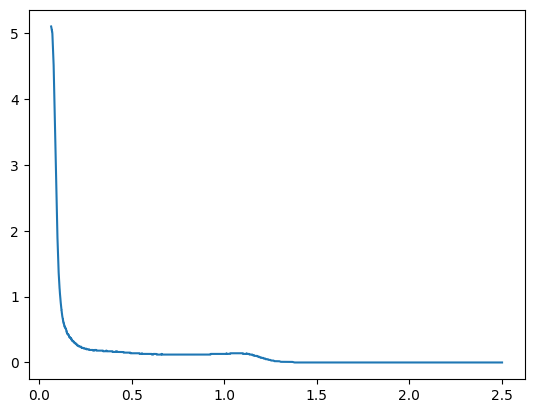

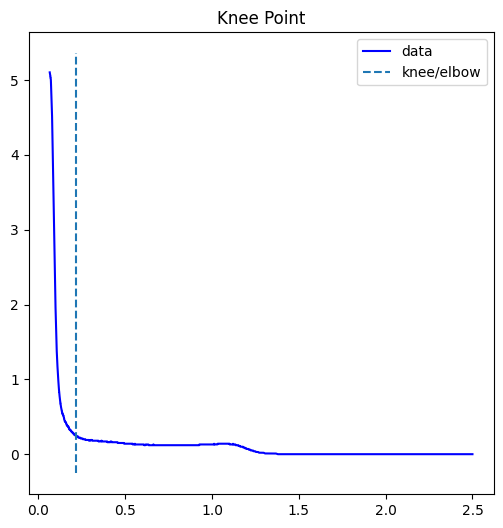

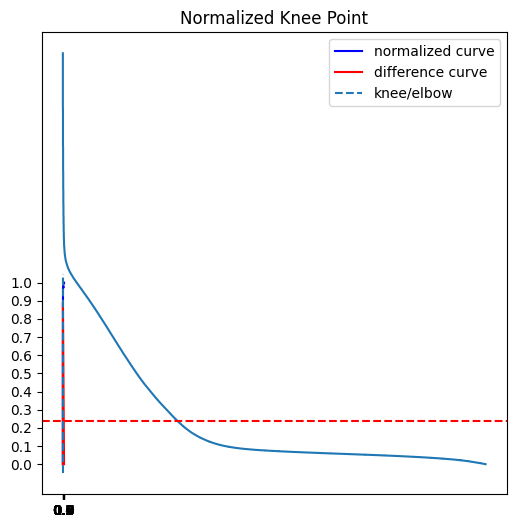

In [461]:
peak = np.argmin(y_dqdv)
plt.plot(x_volt[peak:], -y_dqdv[peak:])
k = KneeLocator(x_volt[peak:], -y_dqdv[peak:], curve='convex', direction='decreasing',S=30, interp_method='interp1d')
k.plot_knee()
k.plot_knee_normalized()
plt.plot(cap_0, voltage_0)
plt.axhline(y=k.knee_y, color='r', linestyle='--')
k.knee


0.1434176217621762

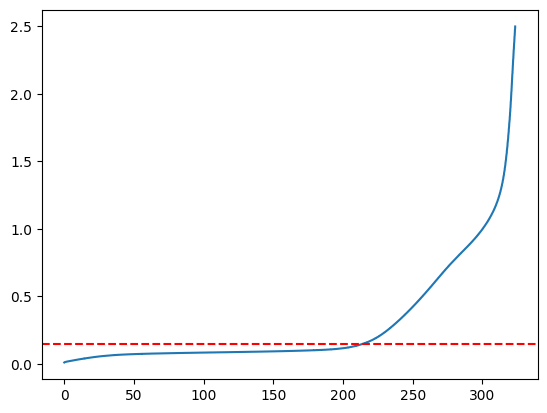

In [476]:
data = np.column_stack((x_volt[peak:], -y_dqdv[peak:]))
rotor = Rotor()
rotor.fit_rotate(data)
elbow_idx = rotor.get_elbow_index()
plt.plot(cap_1, voltage_1)
plt.axhline(data[elbow_idx-250][0], color='r', linestyle='--')
data[elbow_idx-250][0]

In [366]:
k.all_knees

{1.1162}

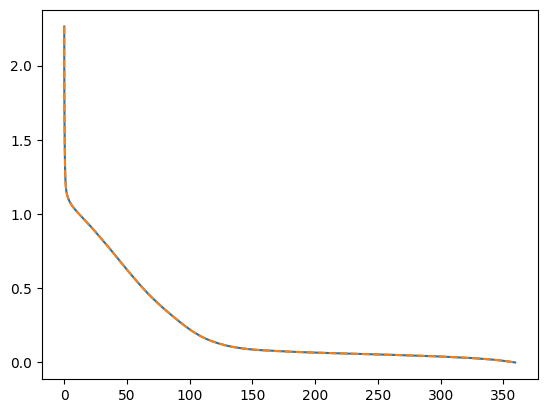

In [301]:
plt.plot(y_cap, x_volt)
plt.plot(cap_0, voltage_0, linestyle='--')

0.1473360336033603

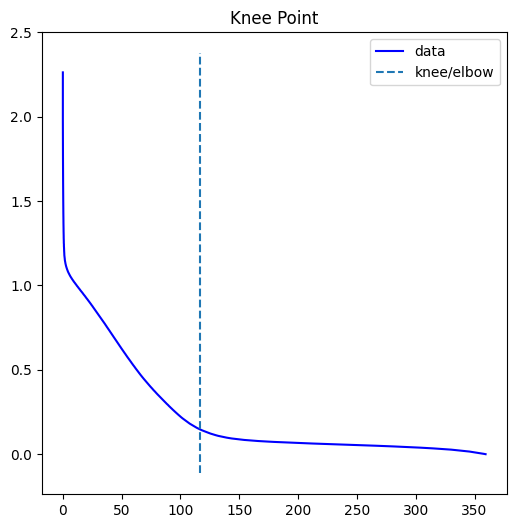

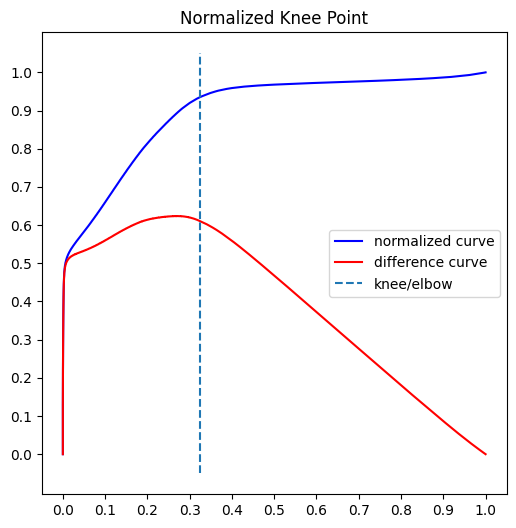

In [358]:
k = KneeLocator(y_cap, x_volt, curve='convex', direction='decreasing', S=1, interp_method='interp1d')
k.plot_knee()
k.plot_knee_normalized()
k.knee_y

In [361]:
p = np.argmax(k.y_difference)
print(k.norm_knee)
print(k.x_difference[p])
print(x_volt[p])


0.3241513633834168
0.26997707422383865
0.24058095809580957


In [407]:
df = pd.DataFrame({'voltage': voltage_1, 'cap': cap_1})
unique_cap = df.astype(float).groupby('cap').mean().index #get unique voltage values
unique_v = df.astype(float).groupby('cap').mean()['voltage'] # get capacity for each unique voltage value
x_volt = np.linspace(min(voltage_1), max(voltage_1), num=int(1e4))
f_lit = splrep(unique_cap, unique_v, k=1, s=0)
x_cap = np.linspace(min(cap_1), max(cap_1), num=int(1e4))
y_voltage = splev(x_cap, f_lit)
y_flipped = np.flip(y_voltage)

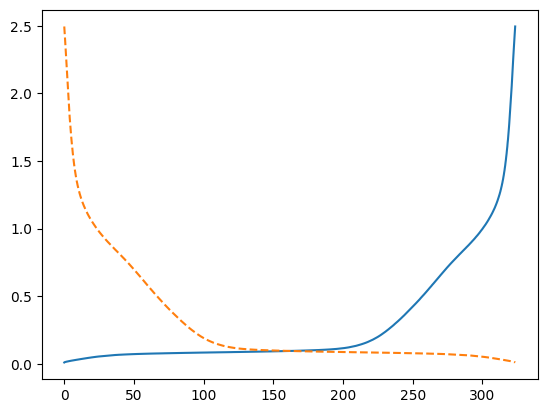

In [411]:
plt.plot(x_cap, y_voltage)
plt.plot(x_cap, y_flipped, linestyle='--')

0.23941089108910915

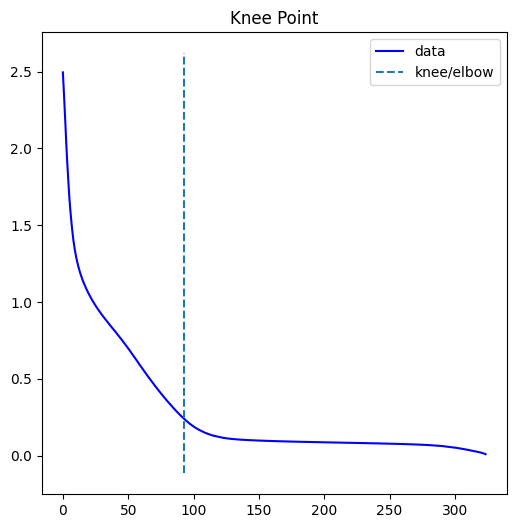

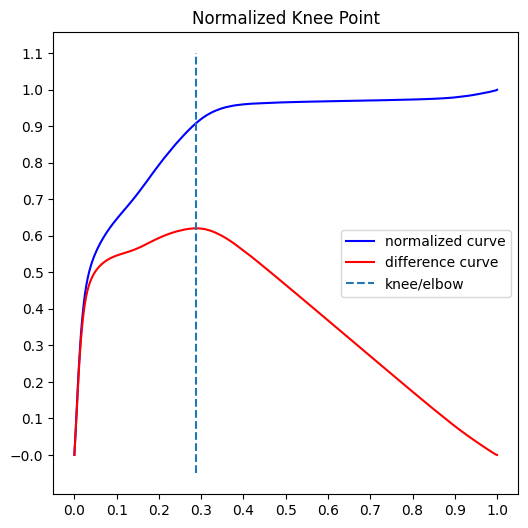

In [414]:
k = KneeLocator(x_cap, y_flipped, curve='convex', direction='decreasing', interp_method='interp1d')
k.plot_knee()
k.plot_knee_normalized()
k.knee_y

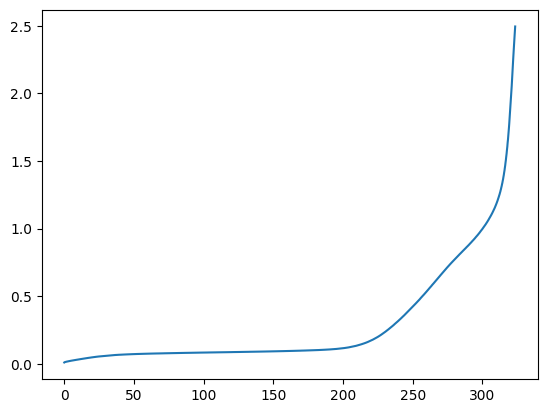

In [449]:
data = np.column_stack((x_cap, y_voltage))
plt.plot(data[:,0], data[:,1])

In [450]:
rotor = Rotor()
rotor.fit_rotate(data)


array([230.19326933,   0.23605962])

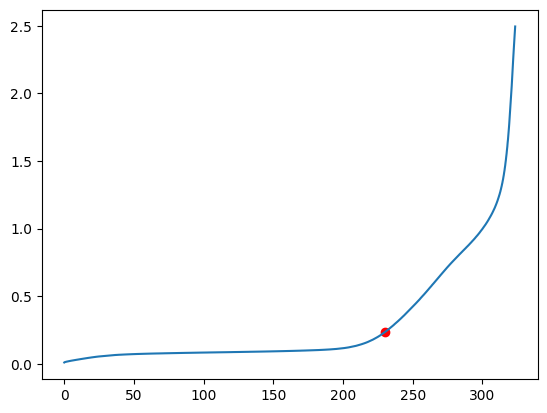

In [456]:
elbow_idx = rotor.get_elbow_index()

plt.plot(data[:,0], data[:,1])
# plt.axvline(x=data[elbow_idx,0], color='r', linestyle='--')
plt.scatter(data[elbow_idx,0], data[elbow_idx,1], color='r')
data[elbow_idx]

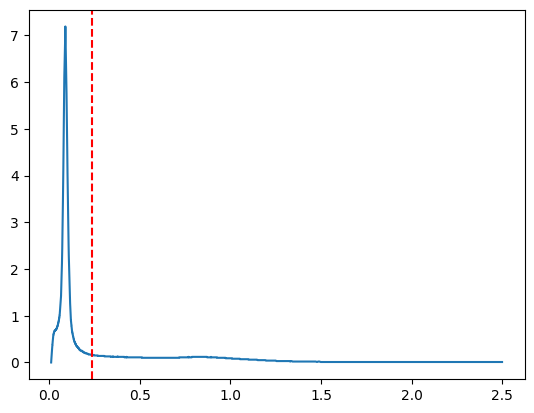

In [458]:
plt.plot(voltage_1,dqdv_1)
plt.axvline(x=data[elbow_idx,1], color='r', linestyle='--')

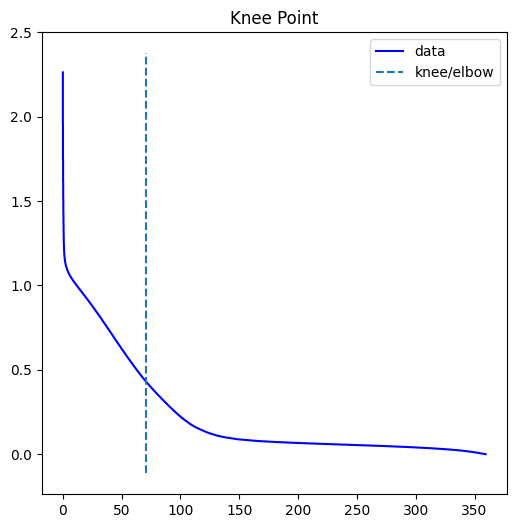

In [258]:
k4 = KneeLocator(unique_v_cap, unique_v, curve='convex', direction='decreasing', interp_method='interp1d')
k4.plot_knee()

In [526]:
voltage_0 = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==0)]['Voltage/V'].values
cap_0 = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==0)]['SpeCap/mAh/g'].values
dqdv_0 = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==0)]['dQ/dV/mAh/V'].values
voltage_1 = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==1)]['Voltage/V'].values
cap_1 = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==1)]['SpeCap/mAh/g'].values
dqdv_1 = test_df.loc[(test_df['CycleNo'] == 1) & (test_df['state']==1)]['dQ/dV/mAh/V'].values


In [500]:
df = pd.DataFrame({'voltage': voltage_0, 'cap': cap_0, 'dqdv': dqdv_0})
unique_v = df.astype(float).groupby('voltage').mean().index #get unique voltage values
unique_v_cap = df.astype(float).groupby('voltage').mean()['cap'] # get capacity for each unique voltage value
unique_v_dqdv = df.astype(float).groupby('voltage').mean()['dqdv'] # get dqdv for each unique voltage value
x_volt = np.linspace(min(voltage_0), max(voltage_0), num=int(1e4))
f_lit = splrep(unique_v, unique_v_cap, k=1, s=0)
y_cap = splev(x_volt, f_lit)
smooth_cap = savgol_filter(y_cap, 101, 5)

f_smooth = splrep(x_volt, smooth_cap, k=3, s=1e-5)
dqdv_2 = splev(x_volt, f_smooth, der=2)
dqdv_1 = splev(x_volt, f_smooth, der=1)
smooth_dqdv_2 = savgol_filter(dqdv_2, 1001, 5)

f_lit_dqdv = splrep(unique_v, unique_v_dqdv, k=1, s=0)
y_dqdv = splev(x_volt, f_lit_dqdv)
smooth_dqdv = savgol_filter(y_dqdv, 101, 5)
f_smooth_dqdv = splrep(x_volt, smooth_dqdv, k=3, s=1e-5)
dqdv_2_2 = splev(x_volt, f_smooth_dqdv, der=1)
smooth_dqdv_2_2 = savgol_filter(dqdv_2_2, 1001, 5)



0.09098169816981698

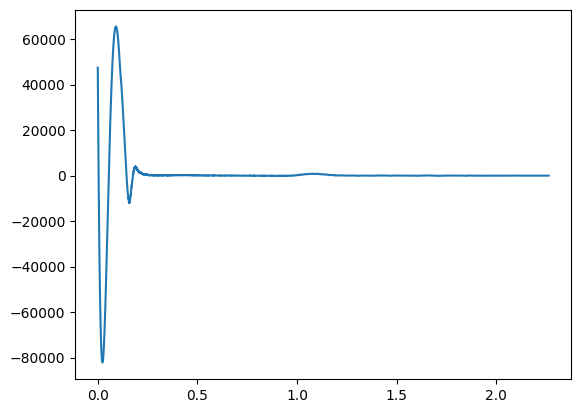

In [503]:
plt.plot(x_volt, smooth_dqdv_2)
peak = np.argmax(smooth_dqdv_2)
x_volt[peak]

0.08894479447944793

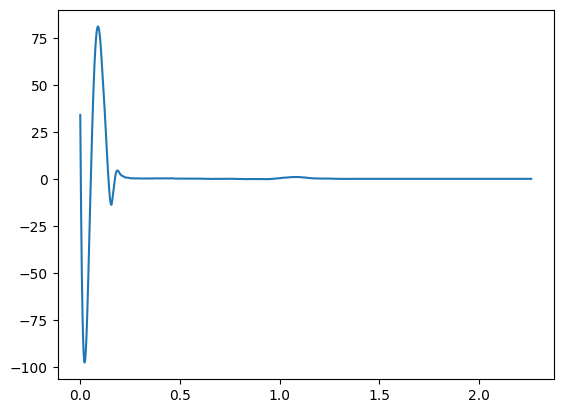

In [504]:
plt.plot(x_volt, smooth_dqdv_2_2)
peak = np.argmax(smooth_dqdv_2_2)
x_volt[peak]

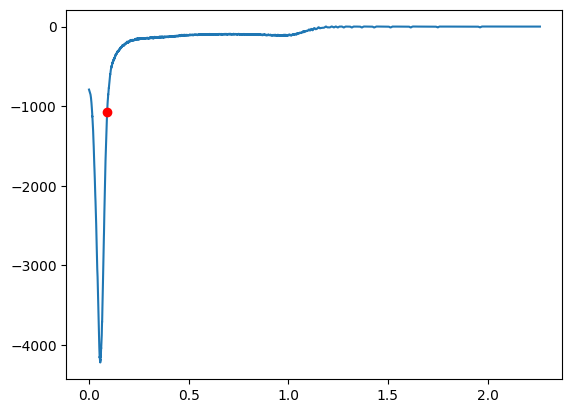

In [490]:
plt.plot(x_volt, dqdv_1)
plt.plot(x_volt[peak], dqdv_1[peak], 'ro')


-5.11

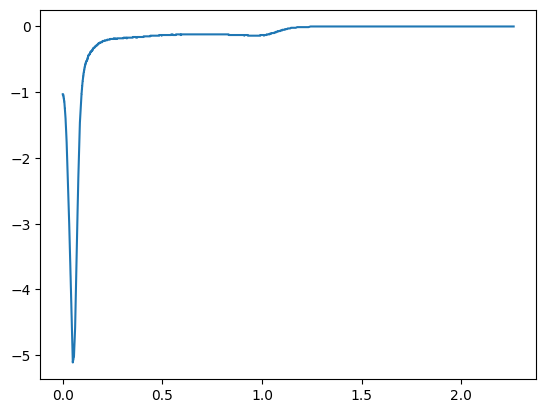

In [553]:
top_val = max(dqdv_0.min(), dqdv_0.max(), key=abs)
plt.plot(voltage_0, dqdv_0)
top_val

7.19

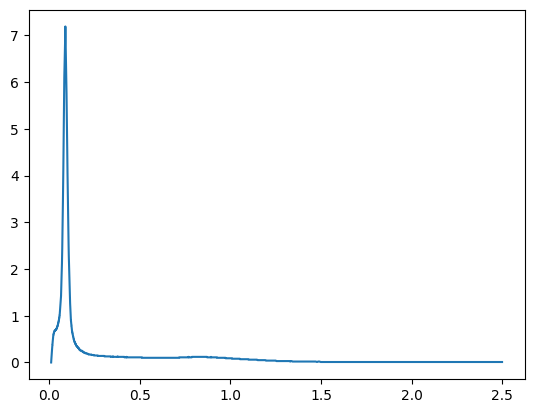

In [554]:
top_val = max(dqdv_1.min(), dqdv_1.max(), key=abs)
plt.plot(voltage_1, dqdv_1)
top_val

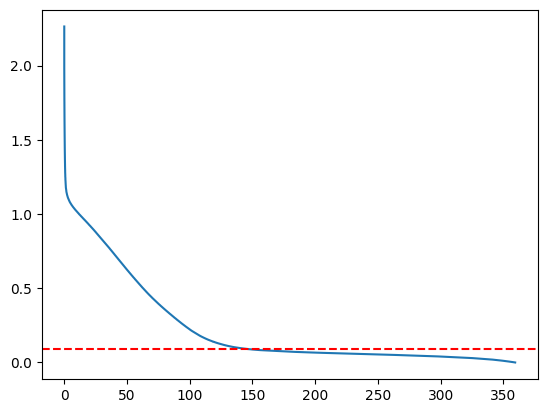

In [505]:
plt.plot(y_cap, x_volt)
plt.axhline(x_volt[peak], color='r', linestyle='--')

In [512]:
df = pd.DataFrame({'voltage': voltage_1, 'cap': cap_1, 'dqdv': dqdv_1})
unique_v = df.astype(float).groupby('voltage').mean().index #get unique voltage values
unique_v_cap = df.astype(float).groupby('voltage').mean()['cap'] # get capacity for each unique voltage value
unique_v_dqdv = df.astype(float).groupby('voltage').mean()['dqdv'] # get dqdv for each unique voltage value

x_volt = np.linspace(min(voltage_1), max(voltage_1), num=int(1e4))
f_lit = splrep(unique_v, unique_v_cap, k=1, s=0)
y_cap = splev(x_volt, f_lit)
smooth_cap = savgol_filter(y_cap, 101, 5)

f_smooth = splrep(x_volt, smooth_cap, k=3, s=1e-5)
dqdv_2 = splev(x_volt, f_smooth, der=2)
dqdv_1 = splev(x_volt, f_smooth, der=1)
smooth_dqdv_2 = savgol_filter(dqdv_2, 1001, 5)

f_lit_dqdv = splrep(unique_v, unique_v_dqdv, k=1, s=0)
y_dqdv = splev(x_volt, f_lit_dqdv)
smooth_dqdv = savgol_filter(y_dqdv, 101, 5)
f_smooth_dqdv = splrep(x_volt, smooth_dqdv, k=3, s=1e-5)
dqdv_2_2 = splev(x_volt, f_smooth_dqdv, der=1)
smooth_dqdv_2_2 = savgol_filter(dqdv_2_2, 1001, 5)


0.1225012101210121

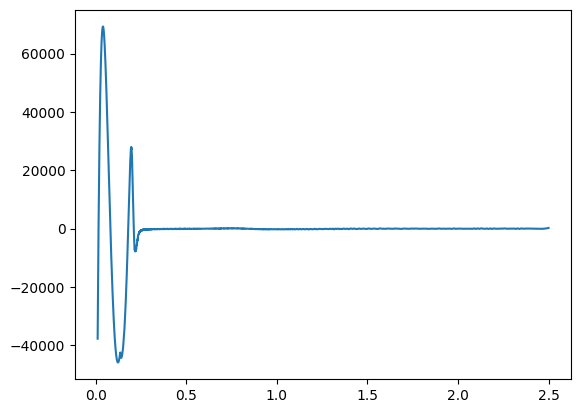

In [517]:
plt.plot(x_volt, smooth_dqdv_2)
peak = np.argmin(smooth_dqdv_2)
x_volt[peak]

0.14366662666266627

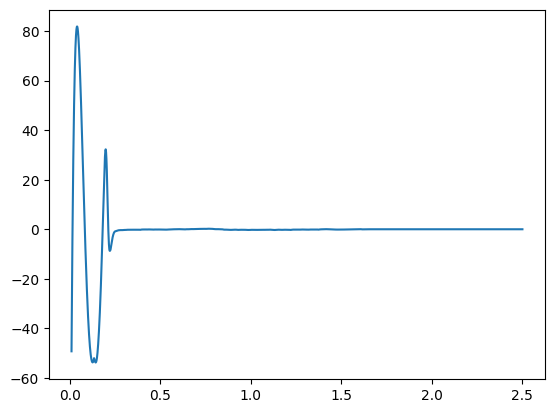

In [519]:
plt.plot(x_volt, smooth_dqdv_2_2)
peak = np.argmin(smooth_dqdv_2_2)
x_volt[peak]

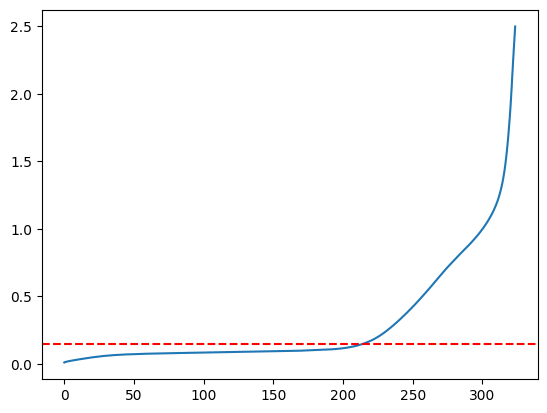

In [520]:
plt.plot(y_cap, x_volt)
plt.axhline(x_volt[peak], color='r', linestyle='--')

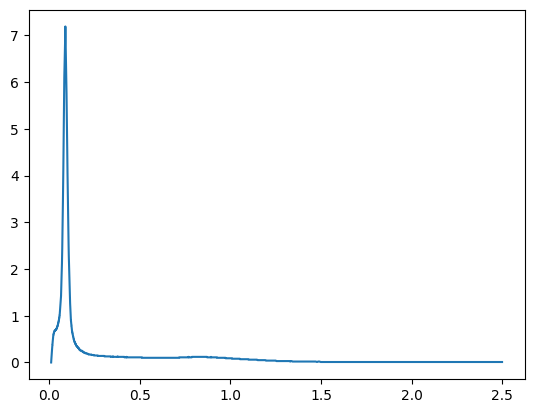

In [523]:
plt.plot(voltage_1, dqdv_1)

In [8]:
import landt_process as lp
import os
folder = r'C:\Users\Piotr\Documents\Github\LANDt-processing\tests\echem_xlsx_test'
file = 'full_column_2_sec.xlsx'
save_dir = r'C:\Users\Piotr\Documents\Github\LANDt-processing\tests\echem_xlsx_test\summaries'
lp.create_summary_from_dir(folder, save_dir)
# df = lp.landt_file_loader(os.path.join(folder, file))


  0%|          | 0/9 [00:00<?, ?it/s]

Error processing file: blank.xlsx


100%|██████████| 9/9 [10:58<00:00, 73.21s/it] 


In [6]:
sum_df = lp.create_cycle_summary(df)

## Processing csv

In [24]:
file_full = 'full_1.csv'
file_part = 'part_1.csv'
path = r'C:\Users\Piotr\OneDrive - Imperial College London\hard_carbon_data_exp\echem_xlsx_test'
df_full = pd.read_csv(os.path.join(path, file_full))
df_part = pd.read_csv(os.path.join(path, file_part))

C:\Users\Piotr\AppData\Local\Temp\ipykernel_46932\3677464114.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_part = pd.read_csv(os.path.join(path, file_part), infer_datetime_format=True)


In [21]:
type(df_full.iloc[4,1])
print(df_full.iloc[4,1])

00:00:00


In [44]:
df_part

,Record,TestTime,StepTime,Current/mA,Capacity/mAh,SpeCap/mAh/g,SOC|DOD/%,Voltage/V,Energy/mWh,SpeEnergy/Wh/kg,...,IncubTemp/dC.,SysTime,Unnamed: 15,CycleNo,StepNo,StepStatus,CapacityC,CapacityD,EnergyC,EnergyD
0,1,00:00:00,00:00:00,0.000,0.000,0.0,0.00,2.3682,0.000,0.0,...,-,2023/11/30 10:42:06,NaN,1,1,R,0.000,0.0,0.000,0.0
1,2,00:10:00,00:10:00,0.000,0.000,0.0,0.00,2.3631,0.000,0.0,...,-,2023/11/30 10:52:06,NaN,1,1,R,0.000,0.0,0.000,0.0
2,3,00:10:19,00:10:19,0.000,0.000,0.0,0.00,2.3630,0.000,0.0,...,-,2023/11/30 10:52:25,NaN,1,1,R,0.000,0.0,0.000,0.0
3,4,00:10:19,00:00:00,-0.037,0.000,0.0,0.00,2.2630,0.000,0.0,...,-,2023/11/30 10:52:25,NaN,1,2,RateD,0.000,0.0,0.000,0.0
4,5,00:10:20,00:00:00,-0.037,0.000,0.0,0.00,2.2509,0.000,0.0,...,-,2023/11/30 10:52:26,NaN,1,2,RateD,0.000,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109559,109560,11-22:07:00,10:32:39,0.037,0.388,316.5,99.92,2.4631,0.110,89.6,...,-,2023/12/12 08:53:30,NaN,35,71,RateC,0.388,0.0,0.110,0.0
109560,109561,11-22:07:08,10:32:46,0.037,0.388,316.6,99.94,2.4732,0.110,89.8,...,-,2023/12/12 08:53:37,NaN,35,71,RateC,0.388,0.0,0.110,0.0
109561,109562,11-22:07:16,10:32:54,0.037,0.388,316.6,99.97,2.4833,0.110,89.9,...,-,2023/12/12 08:53:45,NaN,35,71,RateC,0.388,0.0,0.110,0.0
109562,109563,11-22:07:23,10:33:02,0.037,0.388,316.7,99.99,2.4933,0.110,90.1,...,-,2023/12/12 08:53:53,NaN,35,71,RateC,0.388,0.0,0.110,0.0


In [34]:
def find_header_indices(df):
    indices = []
    for i in range(len(df) - 1):
        current_cell = df.iloc[i, 0]  # Get the value of the current cell
        next_cell = df.iloc[i + 1, 0]  # Get the value of the cell below
    
        # Check if the current cell contains a string and the cell below contains a number
        if isinstance(current_cell, str) and isinstance(next_cell, (int, float)):
            indices.append(i)
    return indices
import datetime

In [45]:
column_names = [
    'Current/mA', 'Capacity/mAh',
    'SpeCap/mAh/g', 'Voltage/V', 'dQ/dV/mAh/V',
    'CycleNo', 'StepNo', 'StepTime'
]
data_types = {'Current/mA': float, 'Capacity/mAh': float, 'SpeCap/mAh/g': float, 'Voltage/V': float, 'dQ/dV/mAh/V': float, 'CycleNo': float, 'StepNo': float, 'StepTime': str}


In [51]:
df = pd.read_csv(os.path.join(path, file_part))

In [53]:
new_df = lp.process_dataframe(df)
new_df

,Current/mA,Capacity/mAh,SpeCap/mAh/g,Voltage/V,dQ/dV/mAh/V,CycleNo,StepNo,StepTime,state
0,0.000,0.000,0.0,2.3682,0.00,1,1,00:00:00,R
1,0.000,0.000,0.0,2.3631,0.00,1,1,00:10:00,R
2,0.000,0.000,0.0,2.3630,0.00,1,1,00:10:19,R
3,-0.037,0.000,0.0,2.2630,0.00,1,2,00:00:00,0
4,-0.037,0.000,0.0,2.2509,-0.00,1,2,00:00:00,0
...,...,...,...,...,...,...,...,...,...
109559,0.037,0.388,316.5,2.4631,0.01,35,71,10:32:39,1
109560,0.037,0.388,316.6,2.4732,0.01,35,71,10:32:46,1
109561,0.037,0.388,316.6,2.4833,0.01,35,71,10:32:54,1
109562,0.037,0.388,316.7,2.4933,0.01,35,71,10:33:02,1


In [55]:
df.columns[0]

'Record'